<a href="https://colab.research.google.com/github/shihwesley/CMPE255/blob/main/pycaret_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 4.6 MB/s 
     |████████████████████████████████| 17.0 MB 64.5 MB/s 
     |████████████████████████████████| 1.7 MB 56.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 8.9 MB/s 
     |████████████████████████████████| 134 kB 72.5 MB/s 
     |████████████████████████████████| 10.4 MB 43.9 MB/s 
     |████████████████████████████████| 268 kB 70.2 MB/s 
     |████████████████████████████████| 636 kB 73.2 MB/s 
     |████████████████████████████████| 25.9 MB 1.2 MB/s 
     |████████████████████████████████| 3.3 MB 57.2 MB/s 
     |████████████████████████████████| 167 kB 68.2 MB/s 
     |████████████████████████████████| 1.3 MB 63.2 MB/s 
     |███████████████████████████████

In [1]:
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [2]:
from pycaret.datasets import get_data
dataset = get_data('iris')

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [3]:
dataset.shape

(150, 5)

In [4]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (135, 5)
Unseen Data For Predictions: (15, 5)


In [5]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'species', session_id=123)

Description  \
0                               session_id   
1                                   Target   
2                              Target Type   
3                            Label Encoded   
4                            Original Data   
5                           Missing Values   
6                         Numeric Features   
7                     Categorical Features   
8                         Ordinal Features   
9                High Cardinality Features   
10                 High Cardinality Method   
11                   Transformed Train Set   
12                    Transformed Test Set   
13                      Shuffle Train-Test   
14                     Stratify Train-Test   
15                          Fold Generator   
16                             Fold Number   
17                                CPU Jobs   
18                                 Use GPU   
19                          Log Experiment   
20                         Experiment Name   
21                                     USI   
22                         Imputation Type   
23          Iterative Imputation Iteration   
24                         Numeric Imputer   
25      Iterative Imputation Numeric Model   
26                     Categorical Imputer   
27  Iterative Imputation Categorical Model   
28           Unknown Categoricals Handling   
29                               Normalize   
30                        Normalize Method   
31                          Transformation   
32                   Transformation Method   
33                                     PCA   
34                              PCA Method   
35                          PCA Components   
36                     Ignore Low Variance   
37                     Combine Rare Levels   
38                    Rare Level Threshold   
39                         Numeric Binning   
40                         Remove Outliers   
41                      Outliers Threshold   
42                Remove Multicollinearity   
43             Multicollinearity Threshold   
44             Remove Perfect Collinearity   
45                              Clustering   
46                    Clustering Iteration   
47                     Polynomial Features   
48                       Polynomial Degree   
49                    Trignometry Features   
50                    Polynomial Threshold   
51                          Group Features   
52                       Feature Selection   
53                Feature Selection Method   
54            Features Selection Threshold   
55                     Feature Interaction   
56                           Feature Ratio   
57                   Interaction Threshold   
58                           Fix Imbalance   
59                    Fix Imbalance Method   

                                                Value  
0                                                 123  
1                                             species  
2                                          Multiclass  
3   Iris-setosa: 0, Iris-versicolor: 1, Iris-virgi...  
4                                            (135, 5)  
5                                               False  
6                                                   4  
7                                                   0  
8                                               False  
9                                               False  
10                                               None  
11                                            (94, 4)  
12                                            (41, 4)  
13                                               True  
14                                              False  
15                                    StratifiedKFold  
16                                                 10  
17                                                 -1  
18                                              False  
19                                              False  
20                                   clf-default

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='species',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [6]:
best = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lda          Linear Discriminant Analysis    0.9678  0.9963  0.9667  0.9758   
nb                            Naive Bayes    0.9578  0.9897  0.9556  0.9713   
qda       Quadratic Discriminant Analysis    0.9567  1.0000  0.9556  0.9708   
lr                    Logistic Regression    0.9478  0.9963  0.9444  0.9638   
knn                K Neighbors Classifier    0.9467  0.9926  0.9444  0.9630   
lightgbm  Light Gradient Boosting Machine    0.9456  0.9852  0.9444  0.9625   
ada                  Ada Boost Classifier    0.9256  0.9809  0.9222  0.9505   
gbc          Gradient Boosting Classifier    0.9256  0.9815  0.9222  0.9505   
et                 Extra Trees Classifier    0.9256  0.9926  0.9222  0.9505   
dt               Decision Tree Classifier    0.9144  0.9369  0.9111  0.9366   
rf               Random Forest Classifier    0.9144  0.9852  0.9111  0.9305   
svm                   SVM - Linear Kernel    0.8522  0.0000  0.8361  0.8261   
ridge                    Ridge Classifier    0.8300  0.0000  0.8222  0.8544   
dummy                    Dummy Classifier    0.3822  0.5000  0.3333  0.1480   

              F1   Kappa     MCC  TT (Sec)  
lda       0.9669  0.9515  0.9560     0.013  
nb        0.9546  0.9364  0.9442     0.012  
qda       0.9533  0.9348  0.9433     0.012  
lr        0.9444  0.9212  0.9304     0.278  
knn       0.9432  0.9197  0.9291     0.112  
lightgbm  0.9419  0.9182  0.9282     0.099  
ada       0.9194  0.8879  0.9026     0.073  
gbc       0.9194  0.8879  0.9026     0.166  
et        0.9194  0.8879  0.9026     0.398  
dt        0.9086  0.8712  0.8843     0.012  
rf        0.9101  0.8712  0.8813     0.450  
svm       0.8197  0.7755  0.8099     0.060  
ridge     0.8178  0.7433  0.7648     0.009  
dummy     0.2128  0.0000  0.0000     0.011

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


In [9]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9000  0.9286  0.8889  0.9250  0.8971  0.8485  0.8616
3       0.8000  0.8571  0.7778  0.8800  0.7750  0.6970  0.7435
4       0.7778  0.8333  0.7778  0.7778  0.7778  0.6667  0.6667
5       0.7778  0.8333  0.7778  0.8667  0.7500  0.6667  0.7223
6       0.8889  0.9167  0.8889  0.9167  0.8857  0.8333  0.8492
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9144  0.9369  0.9111  0.9366  0.9086  0.8712  0.8843
Std     0.0938  0.0694  0.0969  0.0734  0.1013  0.1410  0.1273

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [10]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.8000  1.0000  0.7778  0.8800  0.7750  0.6970  0.7435
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.8889  0.9630  0.8889  0.9167  0.8857  0.8333  0.8492
5       0.8889  0.9815  0.8889  0.9167  0.8857  0.8333  0.8492
6       0.8889  0.9815  0.8889  0.9167  0.8857  0.8333  0.8492
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9467  0.9926  0.9444  0.9630  0.9432  0.9197  0.9291
Std     0.0697  0.0123  0.0745  0.0464  0.0759  0.1052  0.0915

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [12]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9000  1.0000  0.8889  0.9250  0.8971  0.8485  0.8616
3       0.8000  1.0000  0.7778  0.8800  0.7750  0.6970  0.7435
4       0.8889  0.9630  0.8889  0.9167  0.8857  0.8333  0.8492
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.8889  1.0000  0.8889  0.9167  0.8857  0.8333  0.8492
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9478  0.9963  0.9444  0.9638  0.9444  0.9212  0.9304
Std     0.0689  0.0111  0.0745  0.0456  0.0751  0.1041  0.0905

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [13]:
tuned_lr = tune_model(lr)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                       
0       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9000  1.0  0.8889  0.9250  0.8971  0.8485  0.8616
3       0.8000  1.0  0.7778  0.8800  0.7750  0.6970  0.7435
4       0.8889  1.0  0.8889  0.9167  0.8857  0.8333  0.8492
5       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.8889  1.0  0.8889  0.9167  0.8857  0.8333  0.8492
7       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9478  1.0  0.9444  0.9638  0.9444  0.9212  0.9304
Std     0.0689  0.0  0.0745  0.0456  0.0751  0.1041  0.0905

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [14]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.8000  1.0000  0.7778  0.8800  0.7750  0.6970  0.7435
3       0.9000  0.9714  0.8889  0.9250  0.8971  0.8485  0.8616
4       0.8889  0.9259  0.8889  0.9167  0.8857  0.8333  0.8492
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8889  1.0000  0.8889  0.9167  0.8857  0.8333  0.8492
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9478  0.9897  0.9444  0.9638  0.9444  0.9212  0.9304
Std     0.0689  0.0229  0.0745  0.0456  0.0751  0.1041  0.0905

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=33, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


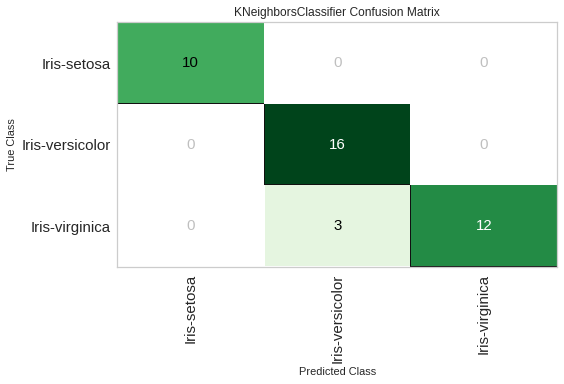

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [15]:
plot_model(tuned_knn, plot = 'confusion_matrix')


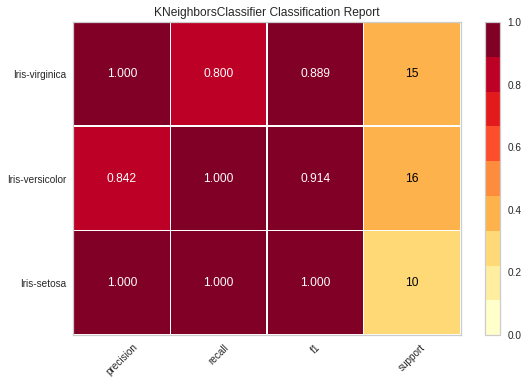

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [16]:
plot_model(tuned_knn, plot = 'class_report')

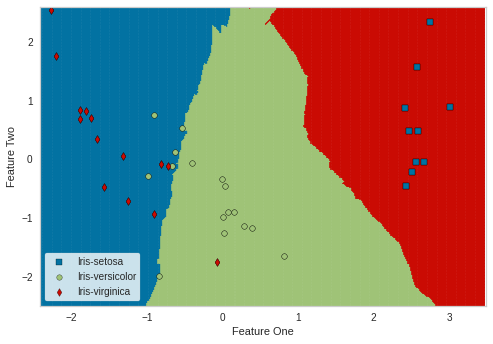

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [17]:
plot_model(tuned_knn, plot='boundary')

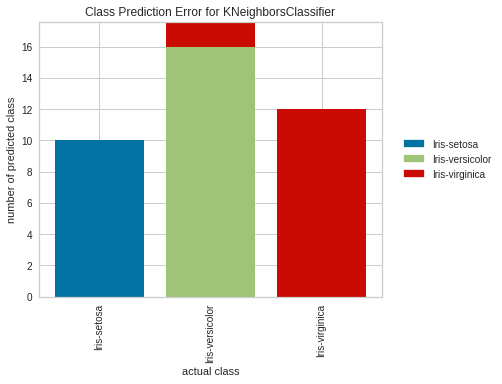

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [18]:
plot_model(tuned_knn, plot = 'error')


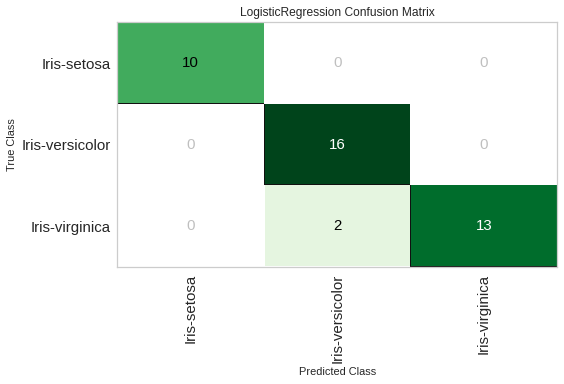

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [19]:
plot_model(tuned_lr, plot = 'confusion_matrix')


In [21]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [22]:
predict_model(tuned_knn)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=33, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  K Neighbors Classifier    0.9268  0.9761  0.9333  0.9384  0.9259  0.8879   

      MCC  
0  0.8953

sepal_length  sepal_width  petal_length  petal_width          species  \
0            5.7          2.6           3.5          1.0  Iris-versicolor   
1            5.2          3.5           1.5          0.2      Iris-setosa   
2            6.5          3.0           5.2          2.0   Iris-virginica   
3            4.8          3.4           1.9          0.2      Iris-setosa   
4            7.0          3.2           4.7          1.4  Iris-versicolor   
5            5.5          2.6           4.4          1.2  Iris-versicolor   
6            4.9          3.0           1.4          0.2      Iris-setosa   
7            4.6          3.6           1.0          0.2      Iris-setosa   
8            5.1          3.8           1.6          0.2      Iris-setosa   
9            5.8          2.7           3.9          1.2  Iris-versicolor   
10           5.7          2.9           4.2          1.3  Iris-versicolor   
11           6.7          3.3           5.7          2.5   Iris-virginica   
12           4.9          2.5           4.5          1.7   Iris-virginica   
13           5.8          2.7           4.1          1.0  Iris-versicolor   
14           6.1          3.0           4.6          1.4  Iris-versicolor   
15           6.0          3.0           4.8          1.8   Iris-virginica   
16           5.1          2.5           3.0          1.1  Iris-versicolor   
17           6.4          2.8           5.6          2.1   Iris-virginica   
18           5.2          4.1           1.5          0.1      Iris-setosa   
19           5.8          2.8           5.1          2.4   Iris-virginica   
20           6.8          2.8           4.8          1.4  Iris-versicolor   
21           7.6          3.0           6.6          2.1   Iris-virginica   
22           6.1          3.0           4.9          1.8   Iris-virginica   
23           7.2          3.2           6.0          1.8   Iris-virginica   
24           7.2          3.0           5.8          1.6   Iris-virginica   
25           4.9          3.1           1.5          0.1      Iris-setosa   
26           4.7          3.2           1.6          0.2      Iris-setosa   
27           6.6          2.9           4.6          1.3  Iris-versicolor   
28           7.9          3.8           6.4          2.0   Iris-virginica   
29           5.6          2.7           4.2          1.3  Iris-versicolor   
30           6.4          3.2           4.5          1.5  Iris-versicolor   
31           4.8          3.4           1.6          0.2      Iris-setosa   
32           5.4          3.0           4.5          1.5  Iris-versicolor   
33           6.9          3.2           5.7          2.3   Iris-virginica   
34           6.3          3.3           6.0          2.5   Iris-virginica   
35           5.8          2.7           5.1          1.9   Iris-virginica   
36           5.2          2.7           3.9          1.4  Iris-versicolor   
37           6.2          2.2           4.5          1.5  Iris-versicolor   
38           6.6          3.0           4.4          1.4  Iris-versicolor   
39           4.7          3.2           1.3          0.2      Iris-setosa   
40           7.2          3.6           6.1          2.5   Iris-virginica   

              Label   Score  
0   Iris-versicolor  0.8788  
1       Iris-setosa  1.0000  
2    Iris-virginica  0.6667  
3       Iris-setosa  1.0000  
4   Iris-versicolor  0.5152  
5   Iris-versicolor  0.7879  
6       Iris-setosa  1.0000  
7       Iris-setosa  1.0000  
8       Iris-setosa  1.0000  
9   Iris-versicolor  0.8788  
10  Iris-versicolor  0.7879  
11   Iris-virginica  0.7879  
12  Iris-versicolor  0.7879  
13  Iris-versicolor  0.8788  
14  Iris-versicolor  0.6970  
15  Iris-versicolor  0.5758  
16  Iris-versicolor  0.6061  
17   Iris-virginica  0.7273  
18      Iris-setosa  1.0000  
19   Iris-virginica  0.6364  
20  Iris-versicolor  0.5152  
21   Iris-virginica  0.7879  
22  Iris-versicolor  0.5152  
23   Iris-virginica  0.7576  
24   Iris-virginica

In [23]:
predict_model(tuned_lr)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0  Logistic Regression    0.9512  1.0  0.9556  0.9566  0.9509  0.9253  0.9287

sepal_length  sepal_width  petal_length  petal_width          species  \
0            5.7          2.6           3.5          1.0  Iris-versicolor   
1            5.2          3.5           1.5          0.2      Iris-setosa   
2            6.5          3.0           5.2          2.0   Iris-virginica   
3            4.8          3.4           1.9          0.2      Iris-setosa   
4            7.0          3.2           4.7          1.4  Iris-versicolor   
5            5.5          2.6           4.4          1.2  Iris-versicolor   
6            4.9          3.0           1.4          0.2      Iris-setosa   
7            4.6          3.6           1.0          0.2      Iris-setosa   
8            5.1          3.8           1.6          0.2      Iris-setosa   
9            5.8          2.7           3.9          1.2  Iris-versicolor   
10           5.7          2.9           4.2          1.3  Iris-versicolor   
11           6.7          3.3           5.7          2.5   Iris-virginica   
12           4.9          2.5           4.5          1.7   Iris-virginica   
13           5.8          2.7           4.1          1.0  Iris-versicolor   
14           6.1          3.0           4.6          1.4  Iris-versicolor   
15           6.0          3.0           4.8          1.8   Iris-virginica   
16           5.1          2.5           3.0          1.1  Iris-versicolor   
17           6.4          2.8           5.6          2.1   Iris-virginica   
18           5.2          4.1           1.5          0.1      Iris-setosa   
19           5.8          2.8           5.1          2.4   Iris-virginica   
20           6.8          2.8           4.8          1.4  Iris-versicolor   
21           7.6          3.0           6.6          2.1   Iris-virginica   
22           6.1          3.0           4.9          1.8   Iris-virginica   
23           7.2          3.2           6.0          1.8   Iris-virginica   
24           7.2          3.0           5.8          1.6   Iris-virginica   
25           4.9          3.1           1.5          0.1      Iris-setosa   
26           4.7          3.2           1.6          0.2      Iris-setosa   
27           6.6          2.9           4.6          1.3  Iris-versicolor   
28           7.9          3.8           6.4          2.0   Iris-virginica   
29           5.6          2.7           4.2          1.3  Iris-versicolor   
30           6.4          3.2           4.5          1.5  Iris-versicolor   
31           4.8          3.4           1.6          0.2      Iris-setosa   
32           5.4          3.0           4.5          1.5  Iris-versicolor   
33           6.9          3.2           5.7          2.3   Iris-virginica   
34           6.3          3.3           6.0          2.5   Iris-virginica   
35           5.8          2.7           5.1          1.9   Iris-virginica   
36           5.2          2.7           3.9          1.4  Iris-versicolor   
37           6.2          2.2           4.5          1.5  Iris-versicolor   
38           6.6          3.0           4.4          1.4  Iris-versicolor   
39           4.7          3.2           1.3          0.2      Iris-setosa   
40           7.2          3.6           6.1          2.5   Iris-virginica   

              Label   Score  
0   Iris-versicolor  0.9449  
1       Iris-setosa  0.9831  
2    Iris-virginica  0.8730  
3       Iris-setosa  0.9561  
4   Iris-versicolor  0.8948  
5   Iris-versicolor  0.9495  
6       Iris-setosa  0.9814  
7       Iris-setosa  0.9974  
8       Iris-setosa  0.9850  
9   Iris-versicolor  0.9733  
10  Iris-versicolor  0.9663  
11   Iris-virginica  0.9932  
12  Iris-versicolor  0.6819  
13  Iris-versicolor  0.9817  
14  Iris-versicolor  0.8975  
15  Iris-versicolor  0.5253  
16  Iris-versicolor  0.7672  
17   Iris-virginica  0.9799  
18      Iris-setosa  0.9913  
19   Iris-virginica  0.9645  
20  Iris-versicolor  0.7842  
21   Iris-virginica  0.9990  
22   Iris-virginica  0.5563  
23   Iris-virginica  0.9736  
24   Iris-virginica

In [24]:
final_lr = finalize_model(tuned_lr)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=LogisticRegression(C=2.833, class_weight='balanc

In [25]:
unseen_predictions = predict_model(final_lr, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy  AUC  Recall  Prec.  F1  Kappa  MCC
0  Logistic Regression       0.0  1.0       0      0   0      0    0

sepal_length  sepal_width  petal_length  petal_width          species  \
0           5.4          3.9           1.7          0.4      Iris-setosa   
1           5.4          3.4           1.7          0.2      Iris-setosa   
2           5.1          3.3           1.7          0.5      Iris-setosa   
3           4.8          3.1           1.6          0.2      Iris-setosa   
4           6.9          3.1           4.9          1.5  Iris-versicolor   

             Label   Score  
0      Iris-setosa  0.9831  
1      Iris-setosa  0.9644  
2      Iris-setosa  0.9700  
3      Iris-setosa  0.9781  
4  Iris-versicolor  0.8227

In [26]:
save_model(final_lr,'Final LR Model 08Feb2020')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model_name=Final LR Model 08Feb2020, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='species',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
         

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='species',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=2.833, class_weight='balanced',
                     

Here we are going to do our own multiclass classification with music genres

In [28]:
import pandas as pd

In [30]:
url = 'https://raw.githubusercontent.com/shihwesley/CMPE255/main/songs_normalize.csv'
music = pd.read_csv(url)


In [31]:
music.head()

artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1       blink-182    All The Small Things       167066     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   
3        Bon Jovi            It's My Life       224493     False  2000   
4          *NSYNC             Bye Bye Bye       200560     False  2000   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.751   0.834    1    -5.444     0       0.0437   
1          79         0.434   0.897    0    -4.918     1       0.0488   
2          66         0.529   0.496    7    -9.007     1       0.0290   
3          78         0.551   0.913    0    -4.063     0       0.0466   
4          65         0.614   0.928    8    -4.806     0       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo         genre  
0        0.3000          0.000018    0.3550    0.894   95.053           pop  
1        0.0103          0.000000    0.6120    0.684  148.726     rock, pop  
2        0.1730          0.000000    0.2510    0.278  136.859  pop, country  
3        0.0263          0.000013    0.3470    0.544  119.992   rock, metal  
4        0.0408          0.001040    0.0845    0.879  172.656           pop

In [32]:
music.info

<bound method DataFrame.info of               artist                                    song  duration_ms  \
0     Britney Spears                  Oops!...I Did It Again       211160   
1          blink-182                    All The Small Things       167066   
2         Faith Hill                                 Breathe       250546   
3           Bon Jovi                            It's My Life       224493   
4             *NSYNC                             Bye Bye Bye       200560   
...              ...                                     ...          ...   
1995  Jonas Brothers                                  Sucker       181026   
1996    Taylor Swift                            Cruel Summer       178426   
1997    Blanco Brown                              The Git Up       200593   
1998       Sam Smith  Dancing With A Stranger (with Normani)       171029   
1999     Post Malone                                 Circles       215280   

      explicit  year  popularity  danceabil

In [35]:
mcclf1 = setup(data = music, 
             target = 'year',
             ignore_features = ['liveness'],
             use_gpu=True)

Description             Value
0                               session_id              4045
1                                   Target              year
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data        (2000, 18)
5                           Missing Values             False
6                         Numeric Features                10
7                     Categorical Features                 6
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set      (1399, 1656)
12                    Transformed Test Set       (601, 1656)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU              True
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              fb00
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['liveness'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='year',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numer...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'p

In [36]:
from pycaret.classification import *


In [37]:
top3 = compare_models(n_select= 3, fold = 5)

Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.1994  0.1157  0.1893  0.2089   
rf               Random Forest Classifier    0.1851  0.1227  0.1718  0.1877   
gbc          Gradient Boosting Classifier    0.1615  0.1108  0.1487  0.2620   
lightgbm  Light Gradient Boosting Machine    0.1558  0.1186  0.1434  0.1516   
dt               Decision Tree Classifier    0.1230  0.0991  0.1160  0.1278   
nb                            Naive Bayes    0.0958  0.1130  0.0879  0.0883   
lda          Linear Discriminant Analysis    0.0951  0.0998  0.0861  0.1864   
ridge                    Ridge Classifier    0.0758  0.0000  0.0679  0.0306   
ada                  Ada Boost Classifier    0.0693  0.1029  0.0637  0.0502   
knn                K Neighbors Classifier    0.0629  0.0994  0.0594  0.0721   
lr                    Logistic Regression    0.0536  0.1050  0.0459  0.0029   
dummy                    Dummy Classifier    0.0536  0.1000  0.0459  0.0029   
svm                   SVM - Linear Kernel    0.0508  0.0000  0.0459  0.0026   
qda       Quadratic Discriminant Analysis    0.0214  0.0989  0.0205  0.0690   

              F1   Kappa     MCC  TT (Sec)  
et        0.1969  0.1577  0.1582     2.718  
rf        0.1800  0.1425  0.1430     2.318  
gbc       0.1654  0.1158  0.1224    45.648  
lightgbm  0.1506  0.1122  0.1125     2.448  
dt        0.1220  0.0781  0.0783     0.110  
nb        0.0719  0.0489  0.0504     0.168  
lda       0.0917  0.0558  0.0593     1.648  
ridge     0.0372  0.0261  0.0285     0.440  
ada       0.0378  0.0197  0.0268     0.714  
knn       0.0606  0.0175  0.0177     0.782  
lr        0.0055  0.0000  0.0000     0.928  
dummy     0.0055  0.0000  0.0000     0.014  
svm       0.0049  0.0000  0.0000     3.212  
qda       0.0193  0.0126  0.0129     0.102

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=4045, verbose=0,
                     warm_start=False), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
 

In [39]:
et = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.2000  0.0000  0.1960  0.2168  0.2004  0.1592  0.1597
1       0.2643  0.0000  0.2505  0.2863  0.2574  0.2250  0.2267
2       0.1714  0.0000  0.1638  0.1965  0.1712  0.1265  0.1270
3       0.2000  0.0000  0.1870  0.2332  0.2097  0.1592  0.1599
4       0.2143  0.0000  0.2162  0.2086  0.2067  0.1735  0.1739
5       0.1571  0.5804  0.1442  0.1339  0.1389  0.1129  0.1135
6       0.2143  0.0000  0.1925  0.2141  0.2053  0.1727  0.1736
7       0.2500  0.0000  0.2512  0.2826  0.2523  0.2115  0.2126
8       0.1786  0.0000  0.1634  0.2115  0.1783  0.1362  0.1370
9       0.1871  0.0000  0.1774  0.1901  0.1823  0.1446  0.1450
Mean    0.2037  0.0580  0.1942  0.2173  0.2003  0.1621  0.1629
Std     0.0319  0.1741  0.0341  0.0419  0.0340  0.0336  0.0339

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=4045, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [40]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.1786  0.0000  0.1766  0.1928  0.1775  0.1354  0.1359
1       0.2500  0.0000  0.2414  0.2653  0.2424  0.2103  0.2121
2       0.1714  0.0000  0.1571  0.2337  0.1749  0.1282  0.1288
3       0.2143  0.0000  0.2078  0.2230  0.2115  0.1739  0.1747
4       0.1786  0.0000  0.1785  0.1703  0.1704  0.1354  0.1359
5       0.1786  0.5688  0.1618  0.1625  0.1671  0.1354  0.1359
6       0.1786  0.0000  0.1628  0.1737  0.1709  0.1357  0.1364
7       0.2000  0.0000  0.1836  0.2350  0.1962  0.1587  0.1595
8       0.1429  0.0000  0.1291  0.1376  0.1250  0.0981  0.0994
9       0.1942  0.0000  0.1851  0.1889  0.1843  0.1523  0.1529
Mean    0.1887  0.0569  0.1784  0.1983  0.1820  0.1464  0.1472
Std     0.0272  0.1706  0.0288  0.0376  0.0292  0.0286  0.0288

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4045, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [41]:
tune_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.1357  0.0000  0.1199  0.1390  0.1004  0.0874  0.0927
1       0.1857  0.0000  0.1672  0.2360  0.1421  0.1395  0.1492
2       0.1000  0.0000  0.0921  0.0990  0.0716  0.0490  0.0520
3       0.2000  0.0000  0.1772  0.2441  0.1643  0.1553  0.1644
4       0.1786  0.0000  0.1666  0.2790  0.1645  0.1323  0.1390
5       0.1571  0.5789  0.1356  0.1136  0.1082  0.1102  0.1171
6       0.1357  0.0000  0.1201  0.1102  0.0989  0.0882  0.0946
7       0.1643  0.0000  0.1439  0.1560  0.1196  0.1183  0.1234
8       0.0929  0.0000  0.0787  0.0467  0.0453  0.0420  0.0448
9       0.1511  0.0000  0.1361  0.1535  0.1206  0.1038  0.1088
Mean    0.1501  0.0579  0.1337  0.1577  0.1135  0.1026  0.1086
Std     0.0332  0.1737  0.0305  0.0697  0.0359  0.0351  0.0370

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.005, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=190,
                       n_jobs=-1, oob_score=False, random_state=4045, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [43]:
tuned_et = tune_model(et, fold = 5)

Accuracy    AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                         
0       0.1357  0.590  0.1176  0.1688  0.1023  0.0873  0.0946
1       0.1500  0.000  0.1295  0.1911  0.1104  0.1023  0.1101
2       0.1321  0.000  0.1154  0.1229  0.0985  0.0835  0.0933
3       0.1536  0.000  0.1327  0.1536  0.1152  0.1060  0.1113
4       0.1183  0.000  0.1071  0.1355  0.0906  0.0683  0.0724
Mean    0.1379  0.118  0.1205  0.1544  0.1034  0.0895  0.0964
Std     0.0128  0.236  0.0094  0.0241  0.0087  0.0136  0.0141

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=10, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.005, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=190, n_jobs=-1,
                     oob_score=False, random_state=4045, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


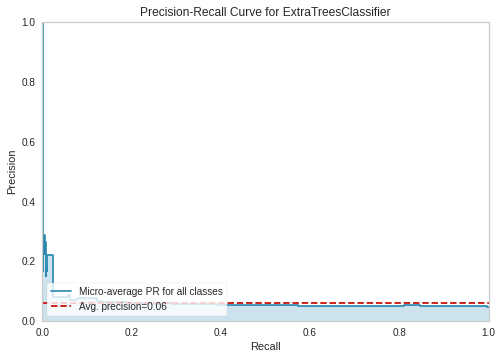

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [44]:
plot_model(tuned_et, plot = 'pr')


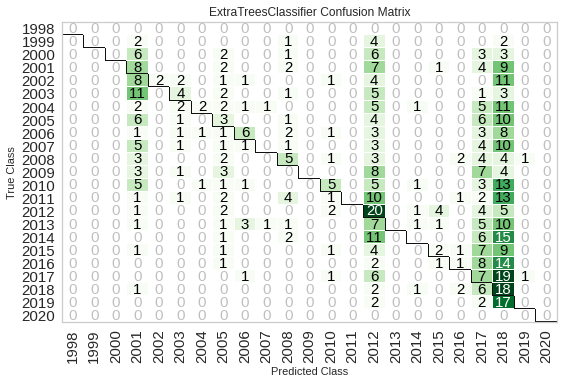

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [45]:
plot_model(tuned_et, plot = 'confusion_matrix')


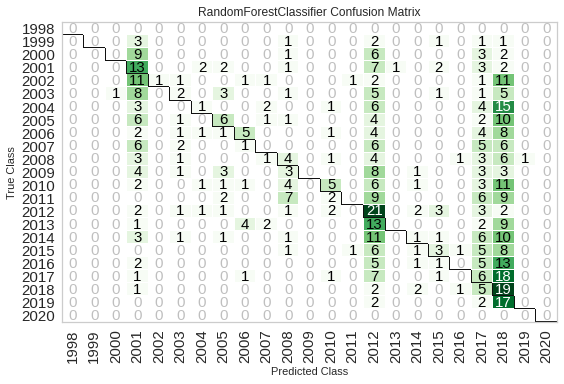

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [47]:
plot_model(tune_rf, plot = 'confusion_matrix')


In [48]:
final_et = finalize_model(tuned_et)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=10, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.005, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=190, n_jobs=-1,
                     oob_score=False, random_state=4045, verbose=0,
                     warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=10, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.005,